In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os

In [2]:
# Load the dataset
a1 = pd.read_excel("/content/case_study1.xlsx")
a2 = pd.read_excel("/content/case_study2.xlsx")

In [3]:
df1 = a1.copy()
df2 = a2.copy()

In [4]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [5]:
# Remove nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [6]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)



df2 = df2.drop(columns_to_be_removed, axis =1)



for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

In [7]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)


PROSPECTID


In [8]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )


In [9]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)


MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [10]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

# Since all the categorical features have pval <=0.05, we will accept all

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


In [11]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

In [12]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0



for i in range (0,total_columns):

    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)


    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1

    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.832800792153077
3 --- 6.099653381646723
3 --- 5.581352009642766
4 --- 1.985584353098778


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.80953830281934
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.384346405965583
7 --- 3.0646584155234238
8 --- 2.898639771299251
9 --- 4.377876915347324
10 --- 2.207853583695844
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721434


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427238
15 --- 1.4210050015175733
16 --- 8.083255010190316
16 --- 1.6241227524040114
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824578
20 --- 2.6233975535272274
21 --- 2.2959970812106176
22 --- 7.360578319196446
22 --- 2.1602387773102567
23 --- 2.8686288267891467
24 --- 6.458218003637272
24 --- 2.8474118865638247
25 --- 4.753198156284083
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808678
26 --- 2.3804746142952653
27 --- 8.60951347651454
27 --- 13.06755093547673
27 --- 3.500040056654653
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.10485591513649
30 --- 2.7971639638512924
31 --- 3.424171203217696
32 --- 10.175021454450922
32 --- 6.408710354561292
32 --- 1.001151196262563
33 --- 3.069197305397273
34 --- 2.8091261600643724
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.8331649740532

In [13]:
# check Anova for columns_to_be_kept

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)


In [14]:
# feature selection is done for cat and num features

In [15]:
# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]


In [16]:
# Label encoding for the categorical features
['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

In [17]:
df['MARITALSTATUS'].unique()
df['EDUCATION'].unique()
df['GENDER'].unique()
df['last_prod_enq2'].unique()
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [18]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3

# Others has to be verified by the business end user

df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

df['EDUCATION'].value_counts()
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            42064 non-null  float64
 1   pct_tl_closed_L6M          42064 non-null  float64
 2   Tot_TL_closed_L12M         42064 non-null  int64  
 3   pct_tl_closed_L12M         42064 non-null  float64
 4   Tot_Missed_Pmnt            42064 non-null  int64  
 5   CC_TL                      42064 non-null  int64  
 6   Home_TL                    42064 non-null  int64  
 7   PL_TL                      42064 non-null  int64  
 8   Secured_TL                 42064 non-null  int64  
 9   Unsecured_TL               42064 non-null  int64  
 10  Other_TL                   42064 non-null  int64  
 11  Age_Oldest_TL              42064 non-null  int64  
 12  Age_Newest_TL              42064 non-null  int64  
 13  time_since_recent_payment  42064 non-null  int

In [19]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])


df_encoded.info()
k = df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

In [20]:
# Machine Learing model fitting
# Data processing

# 1. Random Forest

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)



accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.7636990372043266

Class p1:
Precision: 0.8370457209847597
Recall: 0.7041420118343196
F1 Score: 0.7648634172469203

Class p2:
Precision: 0.7957519116397621
Recall: 0.9282457879088206
F1 Score: 0.8569075937785909

Class p3:
Precision: 0.4423380726698262
Recall: 0.21132075471698114
F1 Score: 0.28600612870275793

Class p4:
Precision: 0.7178502879078695
Recall: 0.7269193391642371
F1 Score: 0.7223563495895703



In [21]:
# 2. xgboost

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.78

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660173

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665036

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.3749428440786465

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



In [22]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.71

Class p1:
Precision: 0.7200392927308448
Recall: 0.722879684418146
F1 Score: 0.7214566929133858

Class p2:
Precision: 0.8088949310545737
Recall: 0.8255698711595639
F1 Score: 0.8171473415734745

Class p3:
Precision: 0.34554140127388533
Recall: 0.32754716981132076
F1 Score: 0.3363037582332429

Class p4:
Precision: 0.6494949494949495
Recall: 0.6248785228377065
F1 Score: 0.6369489846458644



In [23]:
# xgboost is giving me best results
# We will further finetune it


# Apply standard scaler

from sklearn.preprocessing import StandardScaler

columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column



import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.78
Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660173

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665036

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.3749428440786465

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



In [24]:
# No improvement in metrices


In [25]:
# Hyperparameter tuning in xgboost
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.7811719957209081


In [26]:
# Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


# Based on risk appetite of the bank, you will suggest P1,P2,P3,P4 to the business end user

In [27]:
# Hyperparameter tuning for xgboost (Used in the session)

# Define the hyperparameter grid
param_grid = {
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'alpha'           : [1, 10, 100],
  'n_estimators'    : [10,50,100]
}

index = 0

answers_grid = {
    'combination'       :[],
    'train_Accuracy'    :[],
    'test_Accuracy'     :[],
    'colsample_bytree'  :[],
    'learning_rate'     :[],
    'max_depth'         :[],
    'alpha'             :[],
    'n_estimators'      :[]

    }


# Loop through each combination of hyperparameters
for colsample_bytree in param_grid['colsample_bytree']:
  for learning_rate in param_grid['learning_rate']:
    for max_depth in param_grid['max_depth']:
      for alpha in param_grid['alpha']:
          for n_estimators in param_grid['n_estimators']:

              index = index + 1

              # Define and train the XGBoost model
              model = xgb.XGBClassifier(objective='multi:softmax',
                                       num_class=4,
                                       colsample_bytree = colsample_bytree,
                                       learning_rate = learning_rate,
                                       max_depth = max_depth,
                                       alpha = alpha,
                                       n_estimators = n_estimators)



              y = df_encoded['Approved_Flag']
              x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

              label_encoder = LabelEncoder()
              y_encoded = label_encoder.fit_transform(y)


              x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


              model.fit(x_train, y_train)



              # Predict on training and testing sets
              y_pred_train = model.predict(x_train)
              y_pred_test = model.predict(x_test)


              # Calculate train and test results

              train_accuracy =  accuracy_score (y_train, y_pred_train)
              test_accuracy  =  accuracy_score (y_test , y_pred_test)



              # Include into the lists
              answers_grid ['combination']   .append(index)
              answers_grid ['train_Accuracy']    .append(train_accuracy)
              answers_grid ['test_Accuracy']     .append(test_accuracy)
              answers_grid ['colsample_bytree']   .append(colsample_bytree)
              answers_grid ['learning_rate']      .append(learning_rate)
              answers_grid ['max_depth']          .append(max_depth)
              answers_grid ['alpha']              .append(alpha)
              answers_grid ['n_estimators']       .append(n_estimators)


              # Print results for this combination
              print(f"Combination {index}")
              print(f"colsample_bytree: {colsample_bytree}, learning_rate: {learning_rate}, max_depth: {max_depth}, alpha: {alpha}, n_estimators: {n_estimators}")
              print(f"Train Accuracy: {train_accuracy:.2f}")
              print(f"Test Accuracy : {test_accuracy :.2f}")
              print("-" * 30)

Combination 1
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 10
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 2
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 50
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 3
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 1, n_estimators: 100
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 4
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 10
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 5
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 50
Train Accuracy: 0.61
Test Accuracy : 0.60
------------------------------
Combination 6
colsample_bytree: 0.1, learning_rate: 0.001, max_depth: 3, alpha: 10, n_estimators: 100
Train Accuracy: 0.61
Test Accu

In [28]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assume df_encoded is already defined and preprocessed

# Define target and features
y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'], axis=1)

# Apply standard scaler to specific columns
columns_to_be_scaled = ['Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment',
                        'max_recent_level_of_deliq', 'recent_level_of_deliq',
                        'time_since_recent_enq', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr']

scaler = StandardScaler()
df_encoded[columns_to_be_scaled] = scaler.fit_transform(df_encoded[columns_to_be_scaled])

# Encode the target variable if it is categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the BaggingClassifier with DecisionTree as base estimator
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Train the BaggingClassifier
bagging_model.fit(x_train, y_train)

# Make predictions
y_pred = bagging_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

# Print precision, recall, and F1 score for each class
for i, v in enumerate(label_encoder.classes_):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1 Score: {f1_score[i]:.2f}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.77
Class P1:
Precision: 0.80
Recall: 0.76
F1 Score: 0.78

Class P2:
Precision: 0.82
Recall: 0.90
F1 Score: 0.86

Class P3:
Precision: 0.44
Recall: 0.30
F1 Score: 0.35

Class P4:
Precision: 0.73
Recall: 0.71
F1 Score: 0.72



In [31]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assume df_encoded is already defined and preprocessed

# Define target and features
y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'], axis=1)

# Apply standard scaler to specific columns
columns_to_be_scaled = ['Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment',
                        'max_recent_level_of_deliq', 'recent_level_of_deliq',
                        'time_since_recent_enq', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr']

scaler = StandardScaler()
df_encoded[columns_to_be_scaled] = scaler.fit_transform(df_encoded[columns_to_be_scaled])

# Encode the target variable if it is categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define base models
estimators = [
    ('gbm', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=42)),
    ('cat', CatBoostClassifier(iterations=100, verbose=0, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define the stacking classifier with a logistic regression final estimator
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Train the stacking classifier
stacking_model.fit(x_train, y_train)

# Make predictions
y_pred = stacking_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

# Print precision, recall, and F1 score for each class
for i, v in enumerate(label_encoder.classes_):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1 Score: {f1_score[i]:.2f}")
    print()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3080
[LightGBM] [Info] Number of data points in the train set: 33651, number of used features: 54
[LightGBM] [Info] Start training from score -2.156606
[LightGBM] [Info] Start training from score -0.500165
[LightGBM] [Info] Start training from score -1.883865
[LightGBM] [Info] Start training from score -2.072659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 26920, number of used features: 54
[LightGBM] [Info] Start training from score -2.156640
[LightGBM] [Info] Start 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.78
Class P1:
Precision: 0.85
Recall: 0.76
F1 Score: 0.80

Class P2:
Precision: 0.83
Recall: 0.91
F1 Score: 0.87

Class P3:
Precision: 0.46
Recall: 0.33
F1 Score: 0.38

Class P4:
Precision: 0.75
Recall: 0.74
F1 Score: 0.75



In [35]:
print(f'Accuracy: {accuracy:.6f}')

Accuracy: 0.781885


Best Combination:
combination         398.000000
train_Accuracy        0.807762
test_Accuracy         0.783430
colsample_bytree      0.500000
learning_rate         1.000000
max_depth             3.000000
alpha                 1.000000
n_estimators         50.000000
Name: 397, dtype: float64



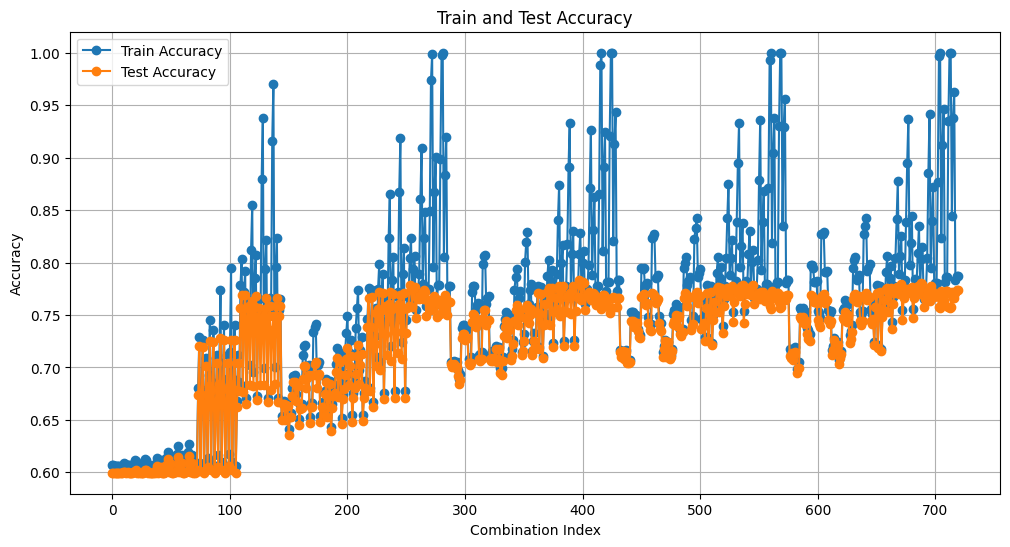

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume answers_grid is already defined

# Convert answers_grid to a DataFrame for easier manipulation
answers_df = pd.DataFrame(answers_grid)

# Find the row with the maximum test accuracy
max_test_accuracy_row = answers_df.loc[answers_df['test_Accuracy'].idxmax()]

# Print the combination and accuracies
print("Best Combination:")
print(max_test_accuracy_row)
print()

# Plot train and test accuracies
plt.figure(figsize=(12, 6))
plt.plot(answers_df['train_Accuracy'], label='Train Accuracy', marker='o')
plt.plot(answers_df['test_Accuracy'], label='Test Accuracy', marker='o')
plt.xlabel('Combination Index')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
import plotly.graph_objects as go
import pandas as pd
# Create interactive plot
fig = go.Figure()

# Add train accuracy trace
fig.add_trace(go.Scatter(
    x=answers_df.index,
    y=answers_df['train_Accuracy'],
    mode='lines+markers',
    name='Train Accuracy'
))

# Add test accuracy trace
fig.add_trace(go.Scatter(
    x=answers_df.index,
    y=answers_df['test_Accuracy'],
    mode='lines+markers',
    name='Test Accuracy'
))

# Update layout
fig.update_layout(
    title='Train and Test Accuracy',
    xaxis_title='Combination Index',
    yaxis_title='Accuracy',
    legend_title='Legend',
    template='plotly_white'
)

# Show plot
fig.show()